### Install Package

Run notebook using v1 of the SDK.

In [1]:
%pip install azureml-interpret

Note: you may need to restart the kernel to use updated packages.


### Authenticate

In [2]:
from azureml.core import Workspace

# This reads the ARM properties from .azureml/config.json by default
ws = Workspace.from_config()

### Load experiment and run of your AutoML job.

In [3]:
from azureml.core import Experiment

experiment_name = "claims-long-term-3y-classifier"

# Replace with the name of your AutoML experiment
experiment = Experiment(workspace=ws, name=experiment_name)

In [4]:
from azureml.core.run import get_run

# Use the known child run ID from your AutoML best_run
best_run = get_run(experiment, run_id="polite_puppy_m62h83l715_0", rehydrate=True)

### Download the Model Explanations

In [5]:
from azureml.interpret import ExplanationClient

# Initialize using the AutoMLRun object
client = ExplanationClient.from_run(best_run)

# Download engineered feature explanations
engineered_explanations = client.download_model_explanation(raw=False)
print("Engineered feature importances:", engineered_explanations.get_feature_importance_dict())

# Optionally, download raw feature explanations
raw_explanations = client.download_model_explanation(raw=True)
print("Raw feature importances:", raw_explanations.get_feature_importance_dict())

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
2025-06-12 00:13:14.450838: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-12 00:13:18.179314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749687199.371518    3124 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749687199.696583    3124 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:174968

Engineered feature importances: {'RxDateOrDispenseDate_ModeCatImputer_Year': 3.938562266936661, 'DOI_ModeCatImputer_Year': 0.525791223728871, 'DOI_ModeCatImputer_Month': 0.32238401154417995, 'NABPNumber_MeanImputer': 0.14553012594647768, 'DOI_ModeCatImputer_Day': 0.1304552309823649, 'ClaimNumber_HashOneHotEncoder_17': 0.12571845015707275, 'DOI_ModeCatImputer_DayOfYear': 0.07934829333422373, 'SOJ_HashOneHotEncoder_13': 0.062091524543313056, 'RxDateOrDispenseDate_ModeCatImputer_DayOfYear': 0.055652893316518154, 'PrescriberNPI_MeanImputer': 0.039109193388158006, 'RxDateOrDispenseDate_ModeCatImputer_DayOfWeek': 0.0279106925795898, 'provider_specialty_HashOneHotEncoder_3': 0.018242656365289597, 'SOJ_HashOneHotEncoder_9': 0.017073601397242663, 'RxDateOrDispenseDate_ModeCatImputer_Day': 0.014976740300340435, 'ApportionedAmount_MeanImputer': 0.01345586023923181, 'cl_body_part_HashOneHotEncoder_0': 0.012896505875951654, 'cl_body_part_HashOneHotEncoder_13': 0.012334803182581011, 'DOI_ModeCatImpu

### Plot Feature Importance

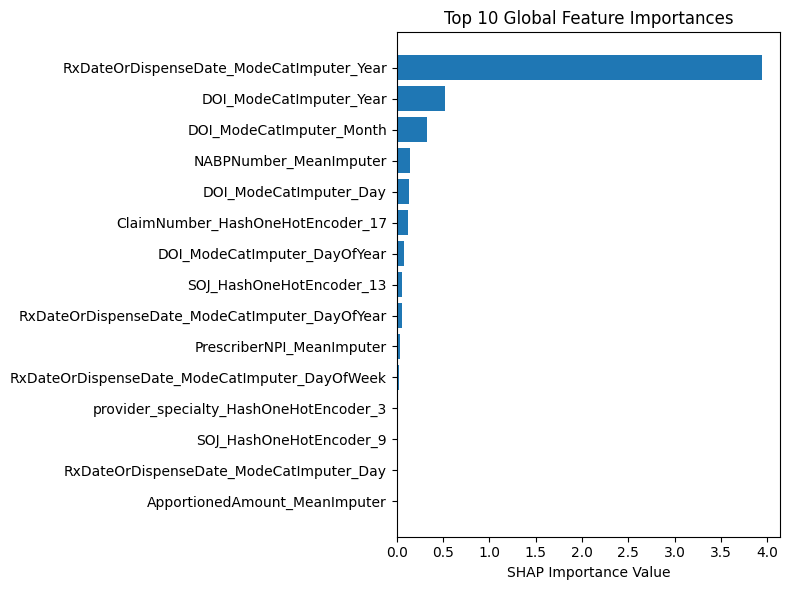

In [11]:
import matplotlib.pyplot as plt

global_imp_dict = engineered_explanations.get_feature_importance_dict()  # Returns {feature: value} 
top_features = dict(sorted(global_imp_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:15])

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(list(top_features.keys())[::-1], list(top_features.values())[::-1])
ax.set_title("Top 10 Global Feature Importances")
ax.set_xlabel("SHAP Importance Value")
plt.tight_layout()
plt.show()